# Correlated-informed neural networks: a new machine learning framework to predict pressure drop in micro-channels

Accurate pressure drop estimation in forced boiling phenomena is important during the thermal analysis and the geometric design of cryogenic heat exchangers. However, current methods to predict the pressure drop have one of two problems: lack of accuracy or generalization to different situations. In this work, we present the correlated-informed neural networks (CoINN), a new paradigm in applying the artificial neural network (ANN) technique combined with a successful pressure drop correlation as a mapping tool to predict the pressure drop of zeotropic mixtures in micro-channels. The proposed approach is inspired by Transfer Learning, highly used in deep learning problems with reduced datasets. Our method improves the ANN performance by transferring the knowledge of the Sun & Mishima correlation for the pressure drop to the ANN. The correlation having physical and phenomenological implications for the pressure drop in micro-channels considerably improves the performance and generalization capabilities of the ANN. The final architecture consists of three inputs: the mixture vapor quality, the micro-channel inner diameter, and the available pressure drop correlation. The results show the benefits gained using the correlated-informed approach predicting experimental data used for training and a posterior test with a mean relative error (mre) of 6%, lower than the Sun & Mishima correlation of 13%. Additionally, this approach can be extended to other mixtures and experimental settings, a missing feature in other approaches for mapping correlations using ANNs for heat transfer applications.

In [6]:
from coinn import net # The CoINN network we trained
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sns

nn_data = loadmat(f"./Data/bestNetParams.mat") #Weights from the CoINN
training_sets = np.load("./Data/training_data.npy", allow_pickle=True).item() # Barrasa et al. data
colors = sns.color_palette("husl", 14)
args = {"fmt":'o','capsize':3, 'elinewidth':1, 'markersize':5,'markeredgecolor':'black','markeredgewidth':0.4}


## Results of CoINN for the experimental setup of Barraza et. al [1]

The main dataset, from Barraza et al. [1], describes the frictional pressure behavior in boiling zeotropic mixtures in horizontal tubes with circular sections. There are three sets of working fluids; the first is composed of hydrocarbon mixtures composed of methane, ethane, and propane, and in some cases with the addition of nitrogen. The second is composed of synthetic refrigerants R-14, R-23, R-32, R-134a, and Ar with different molar compositions, and the last set is composed of a binary mixture of methane and ethane. The inner diameter of the different experiments ranges from 0.5 mm to 2.9 mm, roughness from 0.4 μm to 2.56 μm, critical pressure from 265 kPa to 789 kPa, and mass flux from 143 to 242 kg/s-m2. The set of 37 experiments, includes 15 hydrocarbon mixtures, 14 synthetic mixtures, and 8 binary mixtures. The experiments are train the ANN and validate that the ANN model does not show overfitting.


[1]  R. Barraza, G. Nellis, S. Klein, D. Reindl, Measured and predicted frictional pressure drop for boiling zeotropic mixed refrigerants in horizontal tubes, International Journal of Heat and Mass Transfer 98 (2016) 285–298. doi:10.1016/j. ijheatmasstransfer.2016.03.010.

<ipython-input-8-4da9023cb7ec>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


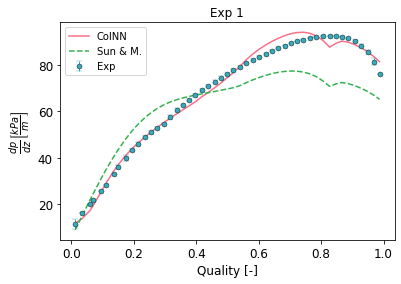

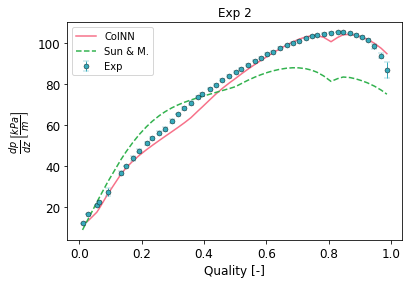

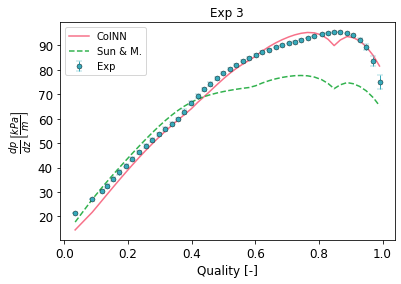

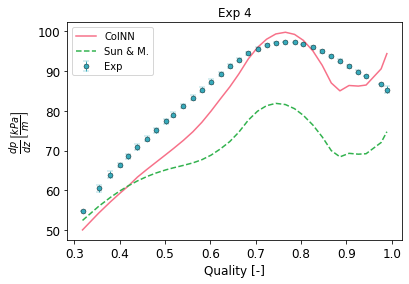

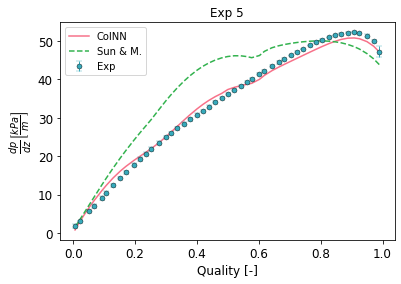

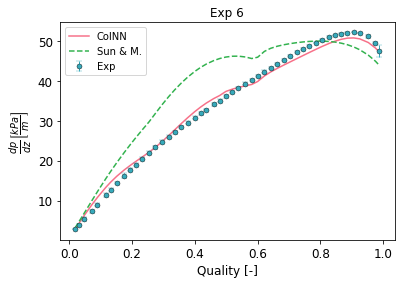

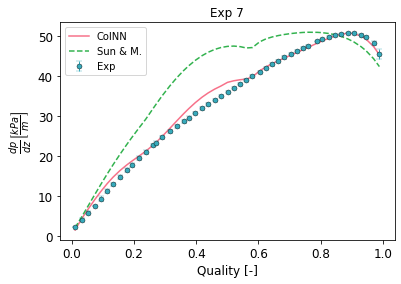

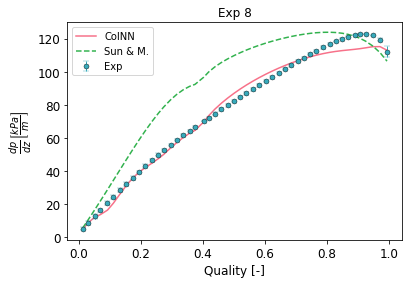

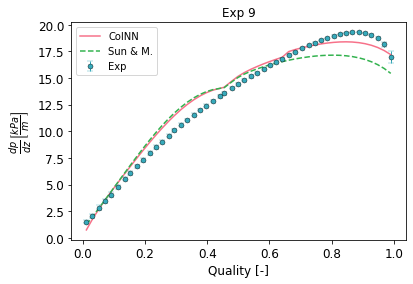

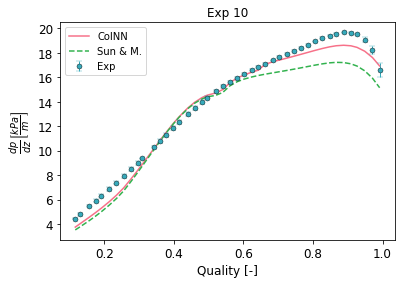

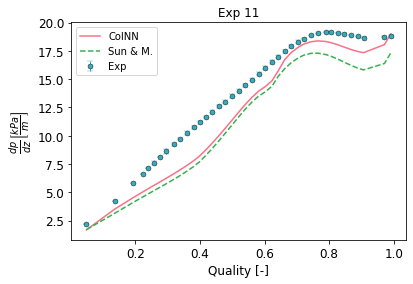

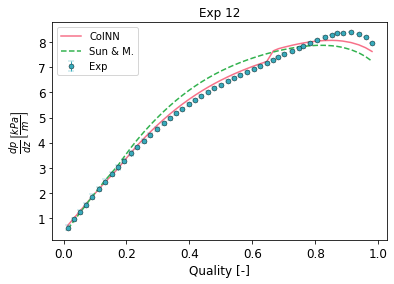

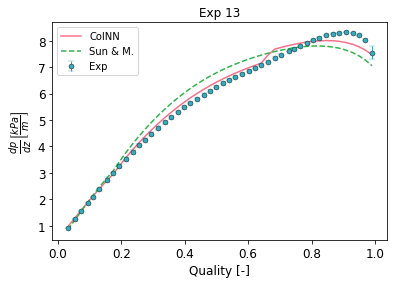

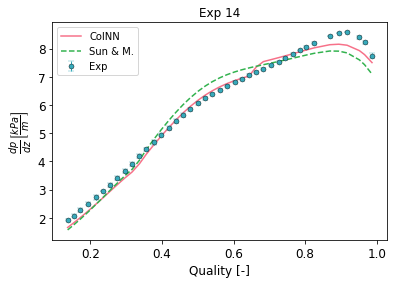

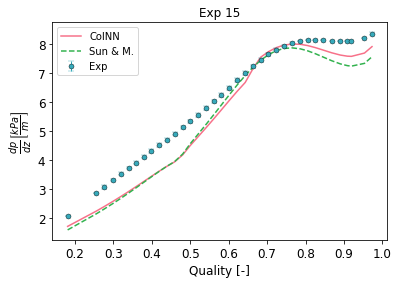

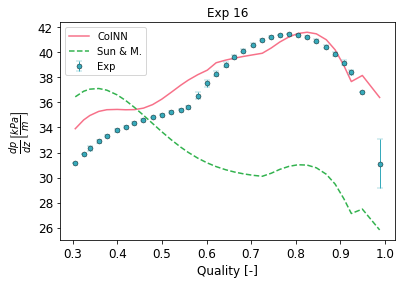

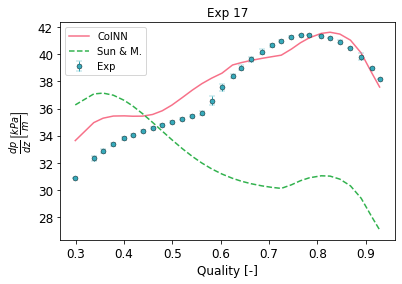

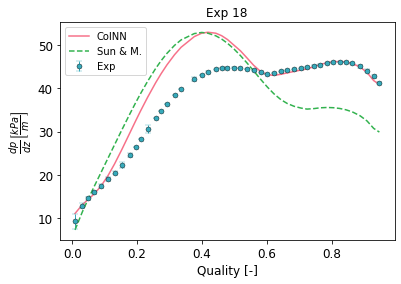

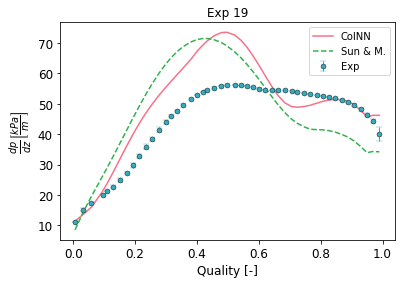

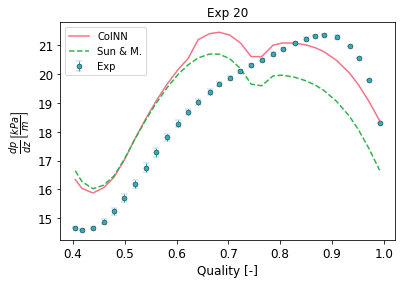

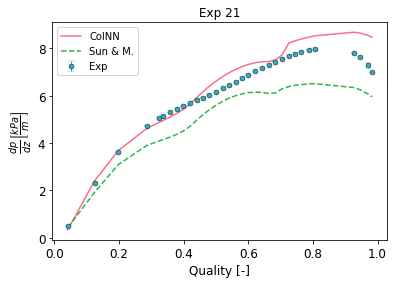

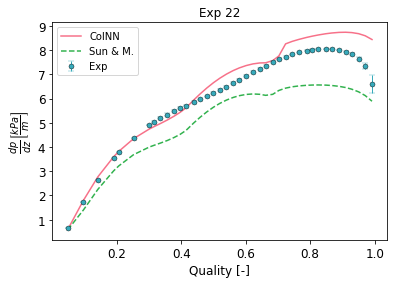

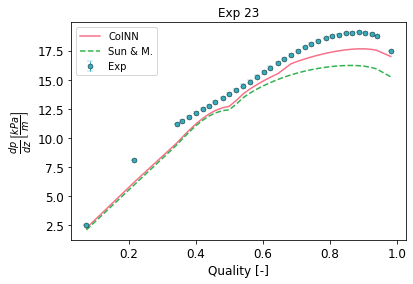

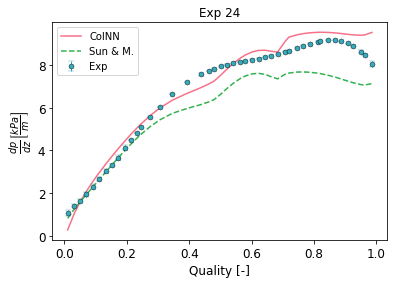

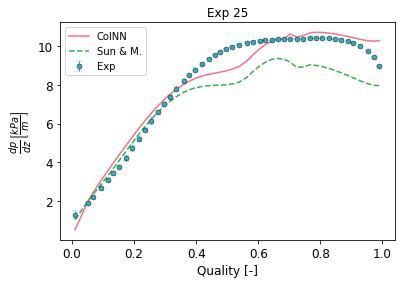

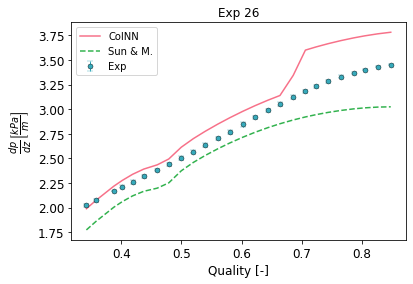

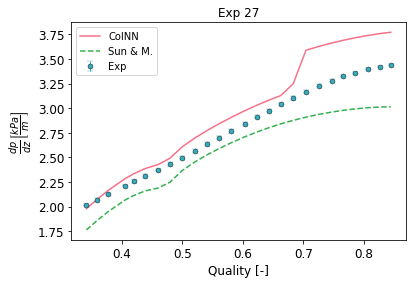

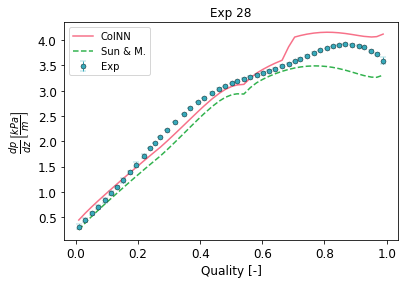

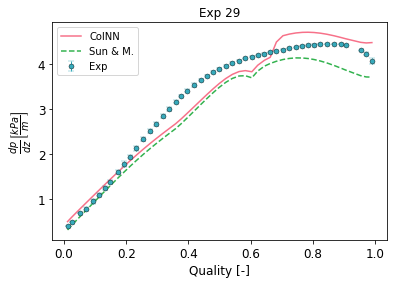

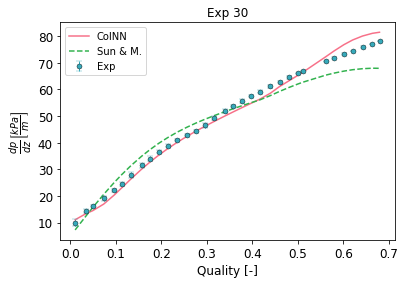

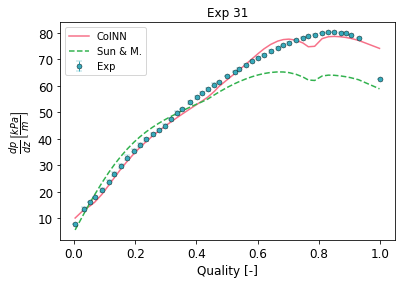

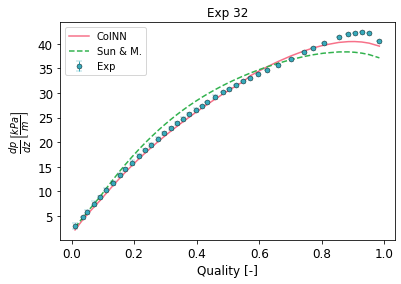

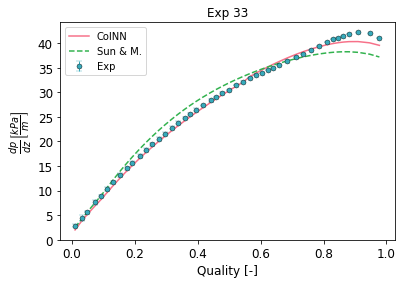

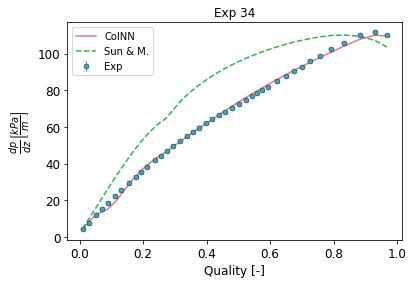

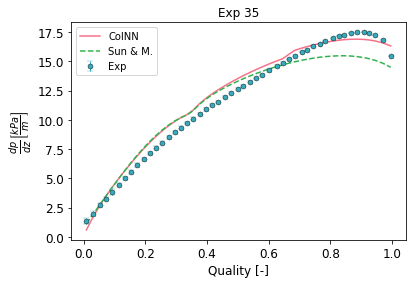

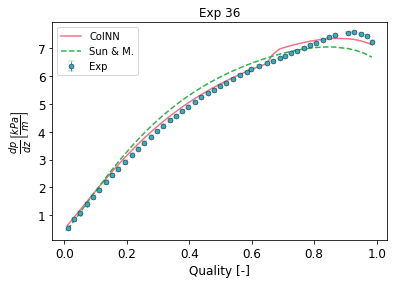

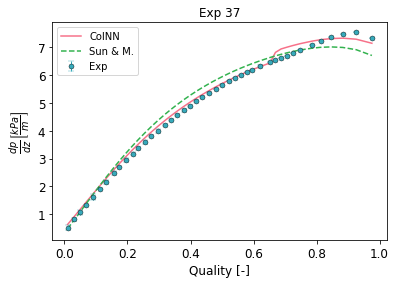

In [8]:
error = []
error_sun = []
for i in range(1,38):
    x = training_sets["experiments"][i][0][:,[0,4,21]]
    y_exp = training_sets["experiments"][i][0][:,[22]]
    y_exp_std = training_sets["experiments"][i][1][:,[22]]
    y = net(x, nn_data)    
    sun = training_sets["experiments"][i][0][:,21]

    error.append(np.mean(np.abs((y - y_exp) / y_exp)))
    error_sun.append(np.mean(np.abs((sun - y_exp.T) / y_exp.T)))
    
    plt.figure()
    xl = training_sets["experiments"][i][0][:,0]
    plt.plot(xl, y, color=colors[0],label = "CoINN")
    plt.plot(xl, sun,"--", color=colors[5], label = "Sun & M.")
    plt.errorbar(xl, y_exp, yerr=y_exp_std[:,0],color=colors[8], label = "Exp", **args)
    plt.legend()
    plt.xlabel("Quality [-]", fontsize = 12)
    plt.ylabel(r"$\frac{dp}{dz} \left[\frac{kPa}{m}\right]$", fontsize=14)
    plt.title(f"Exp {i}")
    plt.tick_params("x",labelsize=12)
    plt.tick_params("y",labelsize=12)


(-0.8, 36.7)

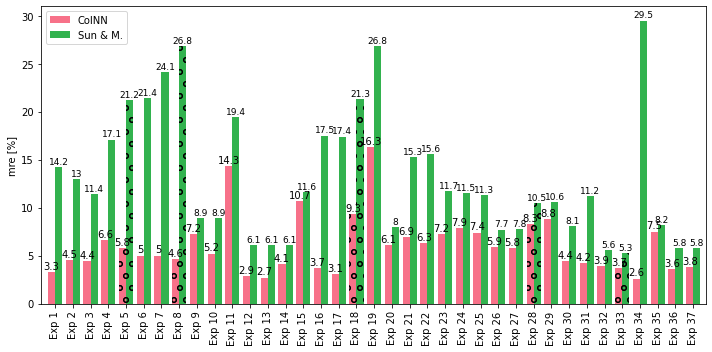

In [9]:
fig, ax = plt.subplots(figsize = (10,5))
testing = np.array([5, 8, 18, 28, 33])
width = 0.4
x = np.arange(37)
labels = [f"Exp {i+1}" for i in x]
b1 = ax.bar(x-width/2, np.round(100*np.array(error), decimals=1), width, color=colors[0], label = "CoINN")
b2 = ax.bar(x+width/2, np.round(100*np.array(error_sun), decimals=1), width, color=colors[5], label = "Sun & M.")
ax.bar(x[testing-1]-width/2, np.round(100*np.array(error)[testing-1], decimals=1), width, color=colors[0], hatch="o")
ax.bar(x[testing-1]+width/2, np.round(100*np.array(error_sun)[testing-1], decimals=1), width, color=colors[5], hatch="o")

ax.set_ylabel('mre [%]')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

ax.bar_label(b1, padding=1)
ax.bar_label(b2, padding=1, fontsize=9)
colorsIm = ["gray" if i not in testing else "black" for i in (x + 1)]
# for xtick, color in zip(ax.get_xticklabels(), colorsIm):
#     xtick.set_color(color)
fig.tight_layout()
ax.set_xlim((-0.8,36.7))

## Pressure drop Keniar et al. Dataset [2]

To get an insight into the proposed model extensibility, we test CoINN with experimental data under different experimental configurations not used during the training of the ANN. In this case, we use the experimental results presented by Keniar et al. [2]. The authors reported the behavior of frictional pressure drop in condensation of zeotropic mixtures in horizontal tubes with circular and square sections. The experiments were conducted using R-134a, R-245fa, and R-1234ze(E). The frictional pressure drop was evaluated under different saturation pressures, ranging from 178 kPa to 1318 kPa; the mass flux range between 50 to 200 kg/s-m2, the tube segment of 240 mm long, the internal diameter of 1.55 mm, and roughness of 0.5 μm. These experiments corroborate the capabilities of the proposed model to predict pressure drop on a new set of experiments with working fluids and configurations not used for the ANN training. The results are shown in figures 9-11 where three working fluids are tested R134a, R245fa, and R1234ze(E), for the case of R-245fa and R1234ze(E), they are new working fluids for the ANN. Additionally, the experimental conditions differ from those used for training, for the case of the saturation pressure, the range for training is between 265 to 790 kPa, and for the Keniar et al. between 178.1 and 1317.9 kPa which is outside the range of those data points used for training.

[2] K. Keniar, S. Garimella, Experimental investigation of refrigerant condensation in circular and square micro- and minichannels, International Journal of Heat and Mass Transfer 176 (2021) 121383. doi:10.1016/j.ijheatmasstransfer.2021. 121383.
URL https://doi.org/10.1016/j.ijheatmasstransfer.2021.121383

In [10]:
from CoolProp.CoolProp import PropsSI
from correlation_sun import dpdz_sun


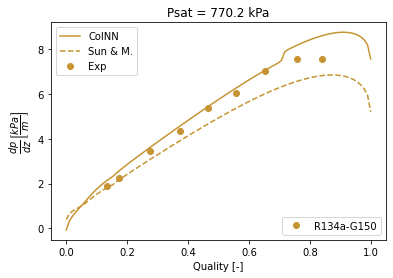

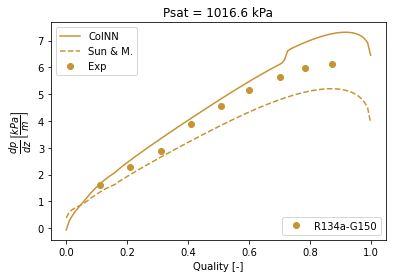

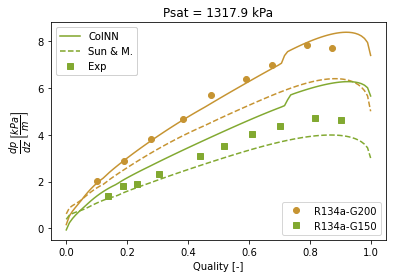

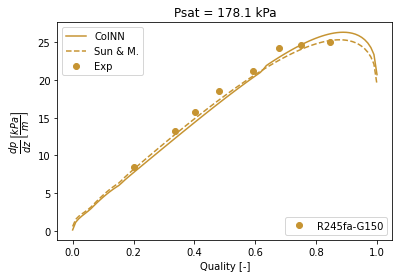

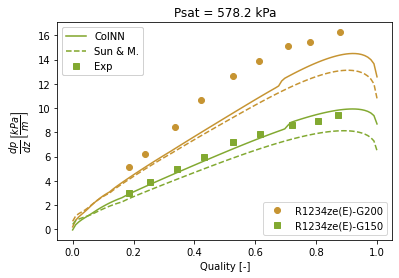

In [12]:
exps = ["fig7a", "fig7b", "fig7c", "fig7d", "fig7e"]
refris = ["R134a", "R245fa", "R1234ze(E)"]
error_net = {}
error_sun = {}
Psat = []
marker = ["o", "s"]
for ei in exps:
    x = np.linspace(1e-5,1-1e-5,100).reshape(100,1)
    exp = np.load(f"./Data/Keniar/{ei}.npy", allow_pickle=True).item()
    if ei == "fig7d":
        exp.pop("G200")
    Tsat = exp["Tsat"] + 273.15
    if ei[-1] == "d":
        refri = refris[1]
    elif ei[-1] == "e":
        refri = refris[2]
    else:
        refri = refris[0]
    plt.figure()
    for nn, k in enumerate(exp.keys()):
        if k in ["G150", "G200"]:
            Psat.append(PropsSI("P", "T", Tsat, "Q", 0, refri))
            p_liq = PropsSI("D", "T", Tsat, "Q", 0, refri)
            p_vap = PropsSI("D", "T", Tsat, "Q", 1, refri)
            
            vis_liq = PropsSI("V", "T", Tsat, "Q", 0, refri)
            vis_vap = PropsSI("V", "T", Tsat, "Q", 1, refri)
            
            Gn = k
            ID = 1.55e-3 # m
            G = float(Gn.replace("G",""))  # kg / m2-s
            e = 0.5e-6 # m
            dp_134 = dpdz_sun(x, ID, G, e, p_liq, p_vap, vis_liq, vis_vap)
            in_net = np.array([dp_134[i] for i in [1,5,22]])[:,:,0].T
            dp_net = net(in_net, nn_data)
            
            
            l1, = plt.plot(x, dp_net, color = colors[nn*2+2])
            l2, = plt.plot(x, dp_134[22], '--', color=colors[nn*2+2])
            l3, = plt.plot(exp[Gn][:,0], exp[Gn][:,1], marker[nn], color=colors[nn*2+2], label=f"{refri}-{k}")
            plt.title(f"Psat = {np.round(Psat[-1]/1000,1)} kPa")
            plt.xlabel("Quality [-]")
            plt.ylabel(r"$\frac{dp}{dz} \left[\frac{kPa}{m}\right]$", fontsize=14)
            legend1 = plt.legend([l1, l2, l3], ["CoINN", "Sun & M.", "Exp"], loc=0)
            plt.legend(loc=4)
            plt.gca().add_artist(legend1)
            # To compare error
            dp_134b = dpdz_sun(exp[Gn][:,[0]], ID, G, e, p_liq, p_vap, vis_liq, vis_vap)
            in_netb = np.array([dp_134b[i] for i in [1,5,22]])[:,:,0].T
            dp_netb = net(in_netb, nn_data)
            
            error_net[refri+k] = np.mean(np.abs(dp_netb - exp[Gn][:,[1]])/exp[Gn][:,[1]])
            error_sun[refri+k] = np.mean(np.abs(dp_134b[22] - exp[Gn][:,[1]])/exp[Gn][:,[1]])
            # plt.title(f"{ei} G = {G} kg / m2-s")

## Conclusions

Modeling physical phenomena of fluid dynamics applications is a current mechanical engineering chal- lenge. Accurate prediction of flow parameters such as the pressure drop or the heat transfer coefficient is still difficult to achieve owing to the complexity of the governing equations involved. Still, two methodologies are used for this: physical modeling and phenomenological modeling. On the one hand, physical modeling allows the generalization of multiple configurations while empirical correlations do not so. The continuous investigation and proposal of novel correlations show a clear trend in improving the generality of its applica- tion. For example, the correlations showed in this paper allow different configurations in the tube diameter, the operating pressure, and even the working fluid, etc. Still, they generally lacks accuracy in specific ap- plications. On the other hand, as mapping ANNs, phenomenological modeling allows the representation of specific problems with high accuracy, but commonly with a reduction in generalization.

In this paper, we successfully proved the application of a novel approach called correlated-informed neural networks (CoINN) for mapping purposes. We applied it in the pressure drop prediction during forced boiling in micro-channels for different mixtures and experimental configurations. Here, the knowledge acquired through experience and experiments and encapsulated in thermodynamic correlations is transferred to an ANN model. Indeed, the proposed model combines both the physical modeling by the pressure drop correlation and the phenomenological modeling by the experimental data used to train the ANN. Furthermore, our model simplified considerably the number of inputs and the number of neurons in the hidden layer to produce good experimental fitting. The final configuration of CoINN had three inputs the quality, the inner diameter, the Sun & Mishima correlation, and one hidden layer with 6 hidden neurons.
The results of our model outperformed those for one of the best correlations used for pressure drop prediction in micro-channels, the Sun & Mishima correlation. The mre for the data used by training and the posterior test averages 6% in CoINN while the Sun & Mishima correlation averages 13%. We tested the overfitting of our model with 5 independent tests on the three different experimental configurations and in all of them, the ANN gives better results than the correlation.

Finally, we evaluated the ANN power of generalization and accuracy using available experimental data of condensation of R-134a, R-245fa, and R-1234ze(E) and with a range of saturation pressure between 178.1 and 1317.9 kPa. From these properties, two of the working fluids were not used for training the ANN and the saturation pressure covers a wider range than the pressure used for training. From these experiments, the average mre for the ANN is 12.5%, while for the Sun & Mishima correlation is 14.2%. Therefore, the benefits of transferring information from the correlation to the ANN allow generalization to new situations.